In [1]:
import pandas as pd
import numpy as np
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import cv2
%matplotlib inline

In [2]:
tf.__version__

'2.0.1'

In [3]:
tf.test.is_gpu_available()

True

In [4]:
# gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
# tf.config.experimental.set_virtual_device_configuration( gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3700)])


In [5]:
myshape = (229,229,1)

### load data

In [7]:
def load_img(img,lab):
    img=tf.io.read_file(img)
    img=tf.image.decode_jpeg(img, channels=1)
    img = tf.cast(img,tf.float32) ##???
    lab = tf.cast(lab,tf.float32)/2 #####???    turn 0,2,4 to 0,1,2 otherwise loss=NaN
    return img,lab

In [8]:
test_data=pd.read_csv('test.txt',header=None,sep=' ',names=['picture','label'])
train_data=pd.read_csv('train.txt',header=None,sep=' ',names=['picture','label'])
valid_data=pd.read_csv('valid.txt',header=None,sep=' ',names=['picture','label'])
# test_data.head()

In [9]:
test_data['dir']=['preprocessed/'+'test/'+pic for pic in test_data['picture']]
train_data['dir']=['preprocessed/'+'train/'+pic for pic in train_data['picture']]
valid_data['dir']=['preprocessed/'+'valid/'+pic for pic in valid_data['picture']]
# test_data.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179C96957C8>]],
      dtype=object)

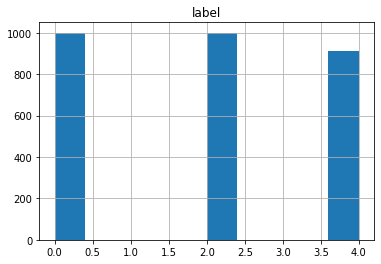

In [10]:
total_set = pd.concat([test_data,train_data,valid_data],ignore_index=True)
iid_total_set = pd.concat([total_set[total_set['label']==i*2][:1000] for i in range(3)])
iid_total_set.hist()

In [11]:
random_set = iid_total_set.sample(frac=1).reset_index(drop=True)

In [12]:
## settings
fraction_val = 0.2

valid_LEN=int(len(random_set)*fraction_val)
train_LEN=int(len(random_set)-valid_LEN)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179C9F3A508>]],
      dtype=object)

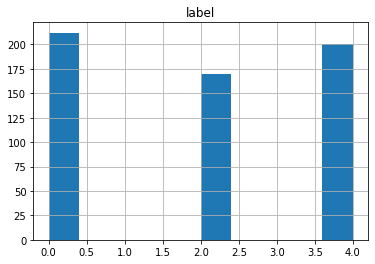

In [13]:
iid_valid = random_set[:valid_LEN]
iid_valid.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017995DFC308>]],
      dtype=object)

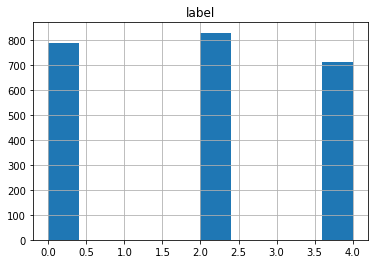

In [14]:
iid_train = random_set[valid_LEN:valid_LEN+train_LEN]
iid_train.hist()

In [14]:
worker_nb = 3
train_worker = int(train_LEN/worker_nb)

In [15]:
worker1 = iid_train[0:train_worker]
worker2 = iid_train[train_worker:train_worker*2]
worker3 = iid_train[train_worker*2:train_worker*3]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227BF35E408>]],
      dtype=object)

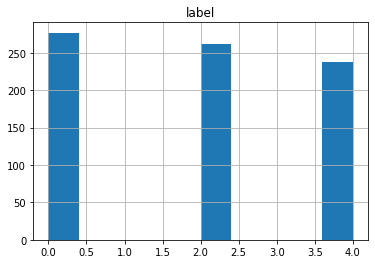

In [16]:
worker1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227BF40C908>]],
      dtype=object)

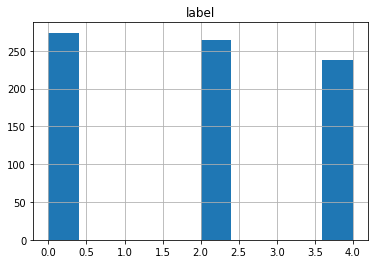

In [17]:
worker2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227BF4B0388>]],
      dtype=object)

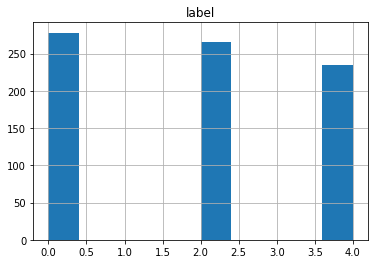

In [18]:
worker3.hist()

In [19]:
worker1.to_pickle('worker1.pkl')
worker2.to_pickle('worker2.pkl')
worker3.to_pickle('worker3.pkl')
iid_valid.to_pickle('iid_valid.pkl')

In [20]:
pd.read_pickle('iid_valid.pkl')

,picture,label,dir
0,20170428115936704.jpg,0,preprocessed\test\20170428115936704.jpg
1,20170525085857949.jpg,2,preprocessed\test\20170525085857949.jpg
2,20170427084620045.jpg,0,preprocessed\test\20170427084620045.jpg
3,20170611090524022.jpg,2,preprocessed\test\20170611090524022.jpg
4,007-6477-400.jpg,4,preprocessed\train\007-6477-400.jpg
5,20170609091623855.jpg,2,preprocessed\test\20170609091623855.jpg
6,007-6719-400.jpg,4,preprocessed\train\007-6719-400.jpg
7,20170607085935786.jpg,2,preprocessed\test\20170607085935786.jpg
8,20170504113211634.jpg,2,preprocessed\test\20170504113211634.jpg
9,20170427191045130.jpg,0,preprocessed\test\20170427191045130.jpg
